## Boosting algorithm 
### Dataset 1 (income)

In [49]:
import nbimporter

from Helper import * 
%matplotlib inline
random_seed = 42

In [50]:
X_train, X_test, y_train, y_test = import_dataset1()

number of training samples:  24129
number of test samples:  6033


In [51]:
%%time 
param_dist = {"max_depth": np.arange(3,15),
              "n_estimators": np.arange(50,500,50),
              "learning_rate": [0.1, 0.01, 0.001],
              'ccp_alpha': [0.0001, 0.001, 0.005, 0.010, 0.015, 0.020, 0.025],
              'loss': ['deviance', 'exponential']}


classifier = GradientBoostingClassifier()
tree_cv = RandomizedSearchCV(classifier, param_dist, cv=StratifiedKFold(5), scoring='roc_auc', n_jobs=-1)

tree_cv.fit(X_train, y_train)

print('\nBest Score : %.2f'%tree_cv.best_score_, ' Best Params : ', str(tree_cv.best_params_))


Best Score : 0.87  Best Params :  {'n_estimators': 350, 'max_depth': 5, 'loss': 'exponential', 'learning_rate': 0.1, 'ccp_alpha': 0.01}
CPU times: user 15.4 s, sys: 470 ms, total: 15.9 s
Wall time: 3min 19s


In [52]:
tree_cv.best_params_

{'n_estimators': 350,
 'max_depth': 5,
 'loss': 'exponential',
 'learning_rate': 0.1,
 'ccp_alpha': 0.01}

In [53]:
bst_prms = tree_cv.best_params_
bst_prms.pop('loss', None)
bst_prms

{'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.1, 'ccp_alpha': 0.01}

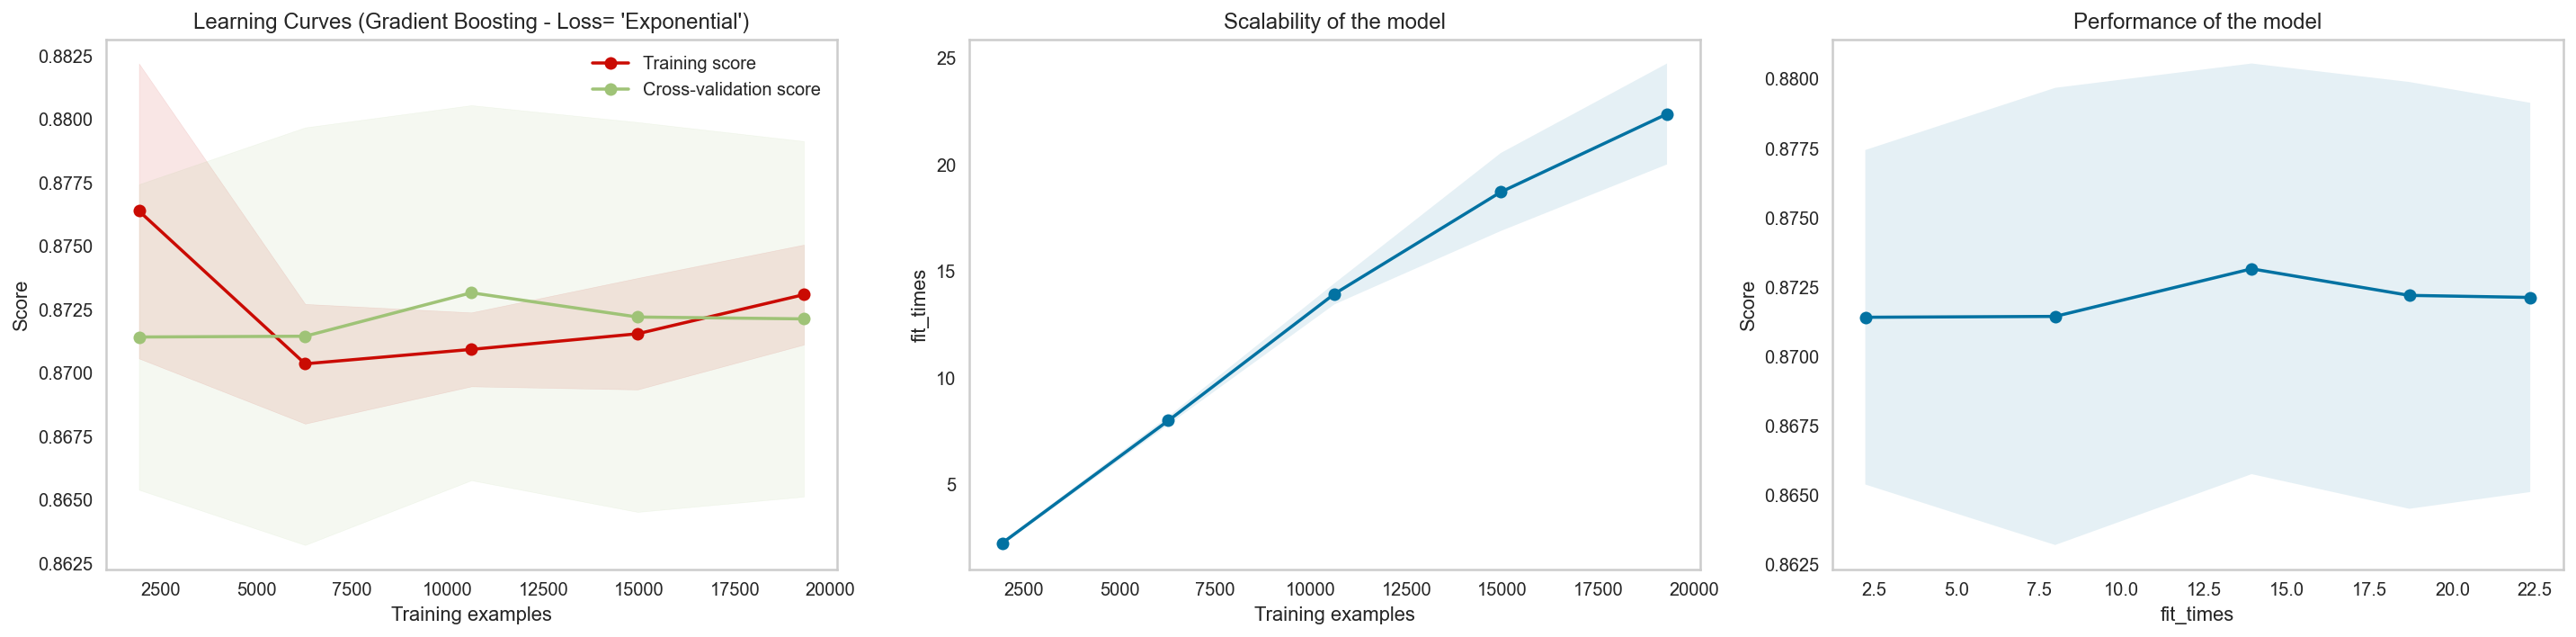

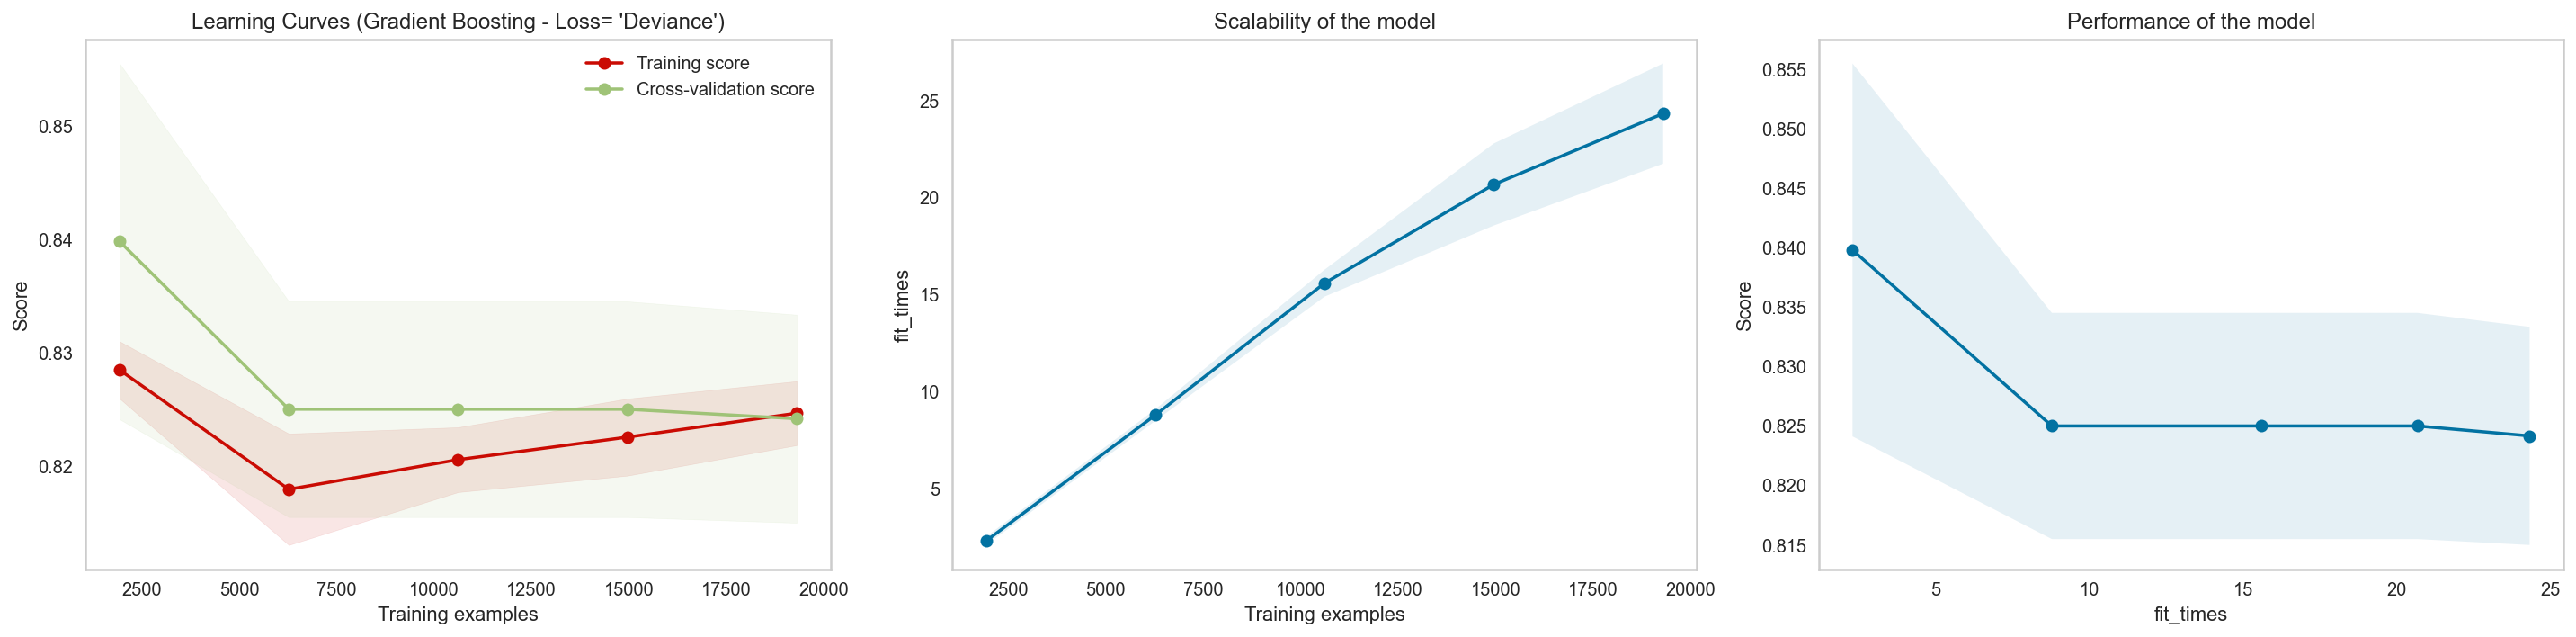

CPU times: user 2.3 s, sys: 300 ms, total: 2.6 s
Wall time: 1min


In [54]:
%%time 

#suptitle = "Learning Curves (Gradient Boosting Training)"

estimator = GradientBoostingClassifier(**tree_cv.best_params_, loss='exponential')
estimator1 = GradientBoostingClassifier(**tree_cv.best_params_, loss='deviance')

title = "Learning Curves (Gradient Boosting - Loss= 'Exponential')"
plot_learning_curve(estimator, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=-1)

plt.tight_layout()
title = "Learning Curves (Gradient Boosting - Loss= 'Deviance')"
plot_learning_curve(estimator1, title, X_train, y_train,cv=StratifiedKFold(5), n_jobs=-1)

plt.tight_layout()
plt.show()

In [55]:
tree_cv.best_params_

{'n_estimators': 350, 'max_depth': 5, 'learning_rate': 0.1, 'ccp_alpha': 0.01}

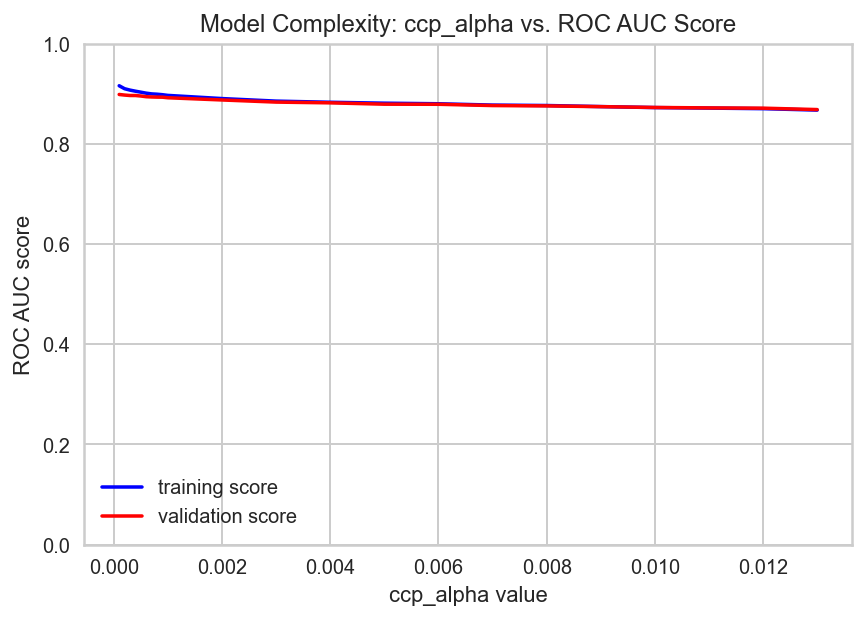

In [65]:
parameter_range = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 
                   0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.004, 
                   0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013]
train_score, val_score = validation_curve(GradientBoostingClassifier(n_estimators= 350,max_depth= 5,learning_rate= 0.1,loss='exponential'),
                                          X_train, y_train, 
                                          scoring = 'roc_auc',
                                          param_name = 'ccp_alpha', 
                                          param_range = parameter_range,
                                          cv=StratifiedKFold(5),n_jobs=-1)


plt.plot(parameter_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(parameter_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Model Complexity: ccp_alpha vs. ROC AUC Score')
plt.ylim(0, 1)
plt.xlabel('ccp_alpha value')
plt.ylabel('ROC AUC score');

In [66]:
classifier = GradientBoostingClassifier(n_estimators= 350, max_depth= 5, learning_rate= 0.1, ccp_alpha = 0.001,loss='exponential')

In [70]:
%%timeit
classifier.fit(X_train, y_train)

13.4 s ± 544 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
%%timeit
y_pred = classifier.predict(X_test)

9.52 ms ± 601 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


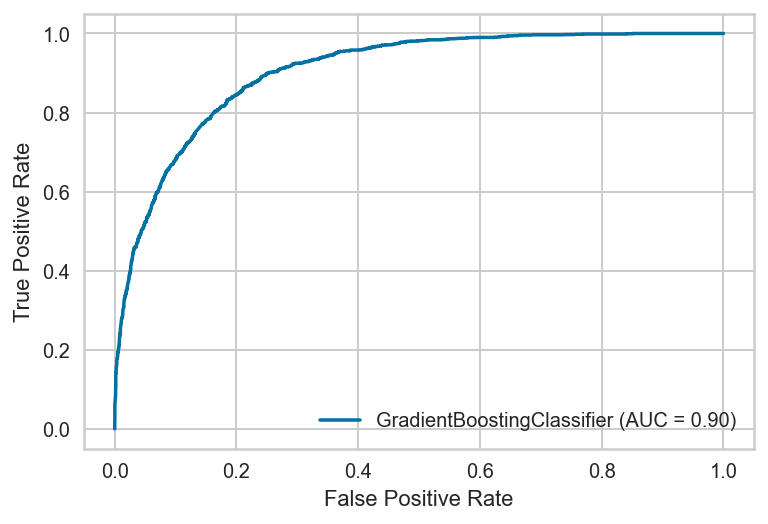

In [62]:
plot_roc_curve(classifier, X_test, y_test);

In [63]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

,precision,recall,f1-score,support
0,0.865123,0.939969,0.900994,4531.000000
1,0.754955,0.557923,0.641654,1502.000000
accuracy,0.844853,0.844853,0.844853,0.844853
macro avg,0.810039,0.748946,0.771324,6033.000000
weighted avg,0.837695,0.844853,0.836428,6033.000000
